In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read in the CSV file

We first provide the path to the file, next we tell pandas to skip the top 318 rows and start reading the data from row 319. We also tell Pandas to not try to infer what the column names are from the file, else it will treat the first row of the data as the column names. Finally, we pass the argument that the seperator between columns will be whitespace.

In [2]:
column_names = ["ScanCount", "Pressure", "Temp1", "Temp2", "Cond1", "Cond2", "Oxy_raw1", "Oxy_raw2", 
                "Flour", "Turb", "Depth", 
                "PSAL1", "PSAL2", "Oxy1", "Oxy2","Flag"]

In [3]:
stn6 = pd.read_csv("./Station 6 210921_ctm_fil_le_der.cnv", 
                    skiprows=318, header=None, sep="\s+", names=column_names)

In [7]:
stn6

,ScanCount,Pressure,Temp1,Temp2,Cond1,Cond2,Oxy_raw1,Oxy_raw2,Flour,Turb,Depth,PSAL1,PSAL2,Oxy1,Oxy2,Flag
0,1,1.492,14.9538,14.8992,2.903222,2.891623,2.6049,2.2406,0.0044,0.156120,1.478,22.7130,22.6446,6.2392,4.5369,-9.990000e-29
1,2,1.493,14.9539,14.8994,2.903051,2.891579,2.6035,2.2399,0.0044,0.156106,1.479,22.7114,22.6441,6.2351,4.5351,-9.990000e-29
2,3,1.494,14.9540,14.8995,2.902866,2.891530,2.6021,2.2393,0.0044,0.156090,1.480,22.7098,22.6436,6.2310,4.5335,-9.990000e-29
3,4,1.494,14.9541,14.8996,2.902670,2.891479,2.6006,2.2385,0.0044,0.156073,1.480,22.7080,22.6431,6.2265,4.5315,-9.990000e-29
4,5,1.495,14.9542,14.8997,2.902465,2.891424,2.5990,2.2378,0.0044,0.156052,1.481,22.7062,22.6426,6.2218,4.5297,-9.990000e-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4125,4126,37.701,6.6064,6.6001,3.242873,3.243867,0.4862,0.5457,0.0141,0.087572,37.345,32.2200,32.2369,-0.0952,0.2163,-9.990000e-29
4126,4127,37.703,6.6034,6.5970,3.242861,3.243854,0.4862,0.5457,0.0143,0.087569,37.347,32.2227,32.2397,-0.0952,0.2163,-9.990000e-29
4127,4128,37.704,6.6031,6.5966,3.242860,3.243852,0.4861,0.5457,0.0143,0.087566,37.348,32.2230,32.2400,-0.0956,0.2163,-9.990000e-29
4128,4129,37.705,6.6038,6.5973,3.242862,3.243854,0.4861,0.5457,0.0143,0.087565,37.349,32.2223,32.2394,-0.0956,0.2163,-9.990000e-29


We can see what the file holds. Notice that 

In [6]:
column_names = {0:"ScanCount", 1:"Pressure", 2:"Temp1", 3:"Temp2", 4:"Cond1", 5:"Cond2", 6:"Oxy_raw1", 7:"Oxy_raw2", 
                8:"Flour", 9:"Turb", 10:"Depth", 
                11:"PSAL1", 12:"PSAL2", 13:"Oxy1", 14:"Oxy2", 15:"Flag"}

In [7]:
stn6 = stn6.rename(columns=column_names)

In [9]:
stn6["Flag"].unique()

array([-9.99e-29,  0.00e+00])

In [10]:
stn6["Flag"].groupby(stn6["Flag"]).count()

Flag
-9.990000e-29    2676
 0.000000e+00    1454
Name: Flag, dtype: int64

In [4]:
sel_good_flag = (stn6["Flag"] >= 0)

In [16]:
stn6.loc[sel_good_flag, "Flag"].unique()

array([0.])

In [15]:
stn6.loc[sel_good_flag]

,ScanCount,Pressure,Temp1,Temp2,Cond1,Cond2,Oxy_raw1,Oxy_raw2,Flour,Turb,Depth,PSAL1,PSAL2,Oxy1,Oxy2,Flag
122,123,1.996,14.9439,14.9466,2.907860,2.904013,2.3902,2.1193,0.0044,0.156509,1.977,22.7585,22.7238,5.4571,4.1610,0.0
123,124,2.015,14.9436,14.9469,2.907572,2.904208,2.3891,2.1187,0.0044,0.156555,1.996,22.7562,22.7253,5.4559,4.1619,0.0
124,125,2.034,14.9434,14.9472,2.907271,2.904383,2.3881,2.1182,0.0044,0.156601,2.015,22.7537,22.7266,5.4550,4.1631,0.0
125,126,2.053,14.9432,14.9474,2.906959,2.904540,2.3872,2.1177,0.0044,0.156649,2.034,22.7512,22.7279,5.4544,4.1643,0.0
126,127,2.072,14.9430,14.9476,2.906638,2.904679,2.3862,2.1172,0.0044,0.156699,2.053,22.7485,22.7289,5.4534,4.1655,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3386,33.442,6.8425,6.8039,3.253264,3.253115,0.6643,0.6985,0.0086,0.086837,33.127,32.1145,32.1490,0.3032,0.5200,0.0
3386,3387,33.455,6.8433,6.8027,3.253371,3.253112,0.6634,0.6978,0.0086,0.086842,33.140,32.1149,32.1500,0.3015,0.5191,0.0
3387,3388,33.467,6.8443,6.8015,3.253493,3.253113,0.6625,0.6970,0.0088,0.086849,33.151,32.1153,32.1512,0.2998,0.5178,0.0
3388,3389,33.478,6.8454,6.8002,3.253632,3.253118,0.6616,0.6963,0.0086,0.086858,33.162,32.1158,32.1524,0.2981,0.5169,0.0


In [23]:
len(stn6_good)

1454

In [5]:
stn6_good = stn6.loc[sel_good_flag].copy()

In [6]:
del(stn6)

In [22]:
stn6_good

,ScanCount,Pressure,Temp1,Temp2,Cond1,Cond2,Oxy_raw1,Oxy_raw2,Flour,Turb,Depth,PSAL1,PSAL2,Oxy1,Oxy2,Flag
122,123,1.996,14.9439,14.9466,2.907860,2.904013,2.3902,2.1193,0.0044,0.156509,1.977,22.7585,22.7238,5.4571,4.1610,0.0
123,124,2.015,14.9436,14.9469,2.907572,2.904208,2.3891,2.1187,0.0044,0.156555,1.996,22.7562,22.7253,5.4559,4.1619,0.0
124,125,2.034,14.9434,14.9472,2.907271,2.904383,2.3881,2.1182,0.0044,0.156601,2.015,22.7537,22.7266,5.4550,4.1631,0.0
125,126,2.053,14.9432,14.9474,2.906959,2.904540,2.3872,2.1177,0.0044,0.156649,2.034,22.7512,22.7279,5.4544,4.1643,0.0
126,127,2.072,14.9430,14.9476,2.906638,2.904679,2.3862,2.1172,0.0044,0.156699,2.053,22.7485,22.7289,5.4534,4.1655,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3386,33.442,6.8425,6.8039,3.253264,3.253115,0.6643,0.6985,0.0086,0.086837,33.127,32.1145,32.1490,0.3032,0.5200,0.0
3386,3387,33.455,6.8433,6.8027,3.253371,3.253112,0.6634,0.6978,0.0086,0.086842,33.140,32.1149,32.1500,0.3015,0.5191,0.0
3387,3388,33.467,6.8443,6.8015,3.253493,3.253113,0.6625,0.6970,0.0088,0.086849,33.151,32.1153,32.1512,0.2998,0.5178,0.0
3388,3389,33.478,6.8454,6.8002,3.253632,3.253118,0.6616,0.6963,0.0086,0.086858,33.162,32.1158,32.1524,0.2981,0.5169,0.0


<AxesSubplot:>

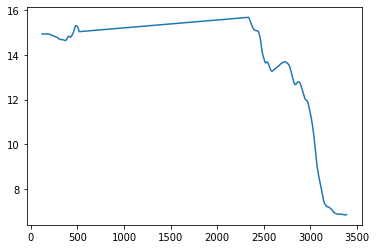

In [21]:
stn6_good["Temp1"].plot()

In [8]:
stn6 = stn6_good

In [9]:
stn6["TempAvg"] = (stn6["Temp1"] + stn6["Temp2"]) * 0.5

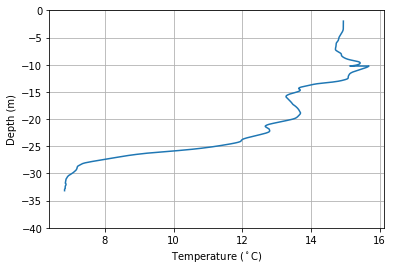

In [32]:
plt.plot(stn6["TempAvg"], -stn6["Depth"])

plt.ylim(-40, 0)

plt.ylabel("Depth (m)")
plt.xlabel("Temperature ($^\circ$C)")
plt.grid()

plt.savefig("./temp6.pdf", dpi=100, bbox_inches="tight")

In [42]:
def plot_variable(var, depth, figNo=1, xlabel=None, ylabel=None, ylim=None, wd=190/25.4, ht=0.5*230/25.4,
                  save=False, savename="Untitled.jpg"):
    plt.rcParams.update({'font.size': 10})
    
    plt.figure(figNo, figsize=(wd, ht))
    
    plt.plot(var, depth)
    if ylim:
        plt.ylim(ylim)
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid()
    
    if save:
        plt.savefig(savename, dpi=150, bbox_inches="tight")

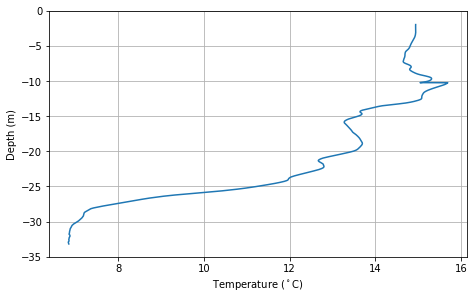

In [41]:
plot_variable(stn6["Temp1"], -stn6["Depth"], xlabel="Temperature ($^\circ$C)", ylabel="Depth (m)", 
              ylim=[-35, 0])

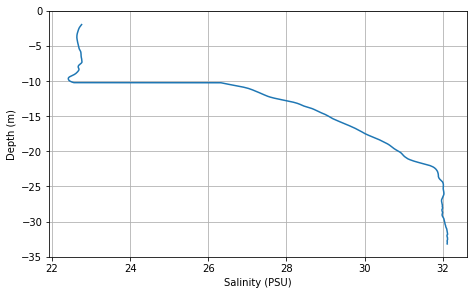

In [37]:
plot_variable(stn6["PSAL1"], -stn6["Depth"], xlabel="Salinity (PSU)", ylabel="Depth (m)", 
              ylim=[-35, 0])

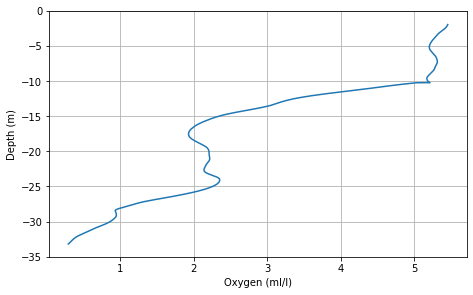

In [38]:
plot_variable(stn6["Oxy1"], -stn6["Depth"], xlabel="Oxygen (ml/l)", ylabel="Depth (m)", 
              ylim=[-35, 0])

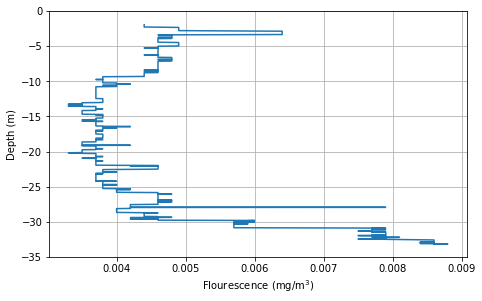

In [43]:
plot_variable(stn6["Flour"], -stn6["Depth"], xlabel="Flourescence (mg/m$^3$)", ylabel="Depth (m)", 
              ylim=[-35, 0])

In [44]:
stn6.columns

Index(['ScanCount', 'Pressure', 'Temp1', 'Temp2', 'Cond1', 'Cond2', 'Oxy_raw1',
       'Oxy_raw2', 'Flour', 'Turb', 'Depth', 'PSAL1', 'PSAL2', 'Oxy1', 'Oxy2',
       'Flag', 'TempAvg'],
      dtype='object')

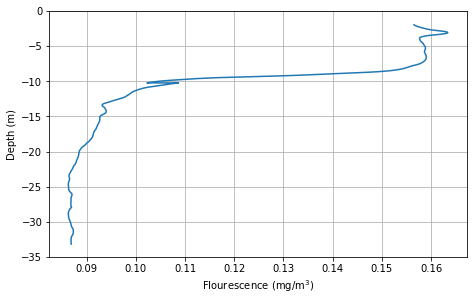

In [45]:
plot_variable(stn6["Turb"], -stn6["Depth"], xlabel="Flourescence (mg/m$^3$)", ylabel="Depth (m)", 
              ylim=[-35, 0])

In [10]:
stn6["TempAvg"] = (stn6["Temp1"] + stn6["Temp2"])*0.5

In [11]:
stn6["SalAvg"] = (stn6["PSAL1"] + stn6["PSAL2"])*0.5

In [47]:
stn6.Depth

122      1.977
123      1.996
124      2.015
125      2.034
126      2.053
         ...  
3385    33.127
3386    33.140
3387    33.151
3388    33.162
3389    33.174
Name: Depth, Length: 1454, dtype: float64

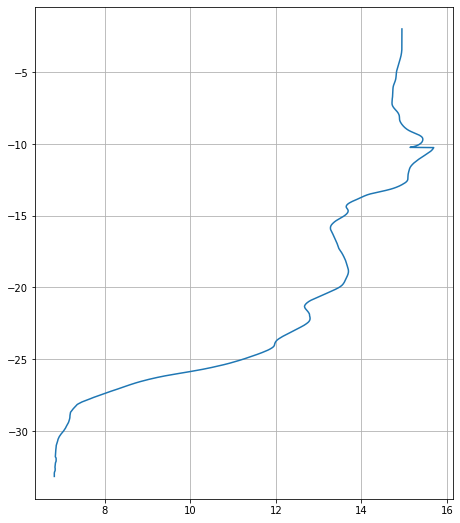

In [25]:
plot_variable(stn6["TempAvg"], -stn6["Depth"])

In [12]:
depth_max = stn6["Depth"].max()
depth_min = stn6["Depth"].min()

In [49]:
print(round(depth_max), depth_min)

33 1.977


In [13]:
depth_bins = np.arange(-round(depth_max), 0, 1)

In [51]:
depth_bins

array([-33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21,
       -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1])

In [14]:
stn6_binned = stn6.groupby(pd.cut(-stn6["Depth"], depth_bins) ).mean()

In [53]:
stn6_binned

,ScanCount,Pressure,Temp1,Temp2,Cond1,Cond2,Oxy_raw1,Oxy_raw2,Flour,Turb,Depth,PSAL1,PSAL2,Oxy1,Oxy2,Flag,TempAvg,SalAvg
Depth,,,,,,,,,,,,,,,,,,
"(-33, -32]",3353.500000,32.823250,6.852771,6.834510,3.254400,3.255348,0.698715,0.728948,0.008233,0.086857,32.513813,32.117560,32.145019,0.366696,0.559158,0.0,6.843641,32.131290
"(-32, -31]",3306.500000,31.786913,6.867443,6.847589,3.255299,3.256340,0.757448,0.785370,0.007796,0.087238,31.487348,32.114167,32.144130,0.542052,0.687724,0.0,6.857516,32.129149
"(-31, -30]",3260.000000,30.790830,6.943919,6.926155,3.257700,3.258699,0.814045,0.842551,0.006032,0.086889,30.500660,32.069470,32.096936,0.759791,0.869485,0.0,6.935037,32.083203
"(-30, -29]",3213.000000,29.786596,7.138804,7.120721,3.269560,3.270598,0.866055,0.892926,0.004834,0.086437,29.506021,32.017713,32.045770,0.920404,1.021896,0.0,7.129763,32.031741
"(-29, -28]",3167.000000,28.770600,7.278973,7.265289,3.278846,3.279722,0.938593,0.961056,0.004156,0.086430,28.499644,31.988869,32.011024,0.955289,1.037547,0.0,7.272131,31.999947
"(-28, -27]",3122.500000,27.755273,7.909111,7.906523,3.332295,3.332774,1.053934,1.081864,0.004507,0.086822,27.493932,31.982714,31.990175,1.205568,1.219900,0.0,7.907817,31.986444
"(-27, -26]",3078.000000,26.747178,8.960916,8.966411,3.424883,3.424799,1.173867,1.221049,0.004609,0.086902,26.495422,32.000464,31.994700,1.670342,1.633040,0.0,8.963663,31.997582
"(-26, -25]",3032.000000,25.735064,10.575245,10.589028,3.567872,3.567825,1.253904,1.322019,0.004060,0.086494,25.492872,32.019751,32.007145,2.110028,2.059304,0.0,10.582136,32.013448
"(-25, -24]",2985.000000,24.728319,11.680394,11.682145,3.663005,3.663604,1.272774,1.353566,0.003794,0.086340,24.495723,31.995600,31.999853,2.326721,2.297494,0.0,11.681269,31.997727


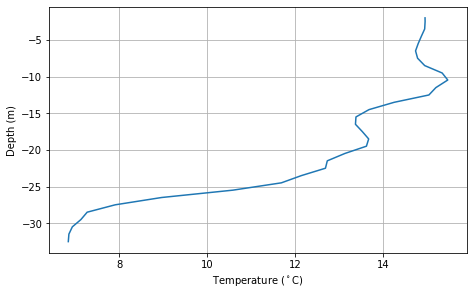

In [54]:
plot_variable(stn6_binned["TempAvg"], -stn6_binned["Depth"], xlabel="Temperature ($^\circ$C)", 
              ylabel="Depth (m)")

## Gibbs Seawater toolbox: GSW

GSW package gives you tools to convert between various oceanographic thermodynamic properties. Full documentation here: https://www.teos-10.org/pubs/gsw/html/gsw_contents.html

In [ ]:
!pip install gsw

In [15]:
import gsw

In [18]:
# approximate longitude and latitude of Byfjorden, the fjord from which the CTD data was collected last year
lon, lat = 5.283, 60.408

In [16]:
stn6["SalAvg"] = (stn6["PSAL1"] + stn6["PSAL2"])*0.5

In [19]:
stn6_binned["SA"] = gsw.SA_from_SP(stn6_binned["SalAvg"].values, stn6_binned["Pressure"].values, lon, lat)

In [20]:
stn6_binned["CT"] = gsw.CT_from_t(stn6_binned["SA"], stn6_binned["TempAvg"], stn6_binned["Pressure"])

In [21]:
stn6_binned["sigma0"] = gsw.sigma0(stn6_binned["SA"], stn6_binned["CT"])

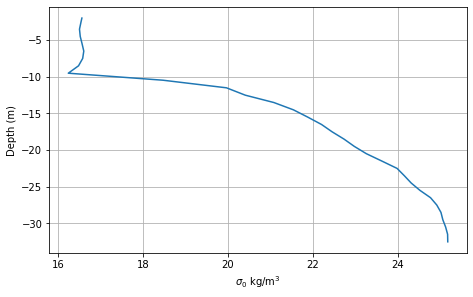

In [61]:
plot_variable(stn6_binned["sigma0"], -stn6_binned["Depth"], xlabel="$\sigma_0$ kg/m$^3$", 
              ylabel="Depth (m)")

In [63]:
stn6_binned["rho"] = gsw.rho(stn6_binned["SA"], stn6_binned["CT"], stn6_binned["Pressure"])

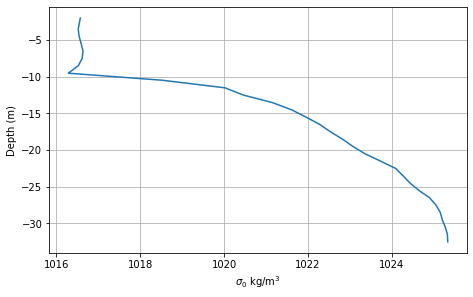

In [64]:
plot_variable(stn6_binned["rho"], -stn6_binned["Depth"], xlabel="$\sigma_0$ kg/m$^3$", 
              ylabel="Depth (m)")

## Exercise 08: Plot with multiple axes

Plot all the variables on a single plot using multiple axes. For reference, use the example here: https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

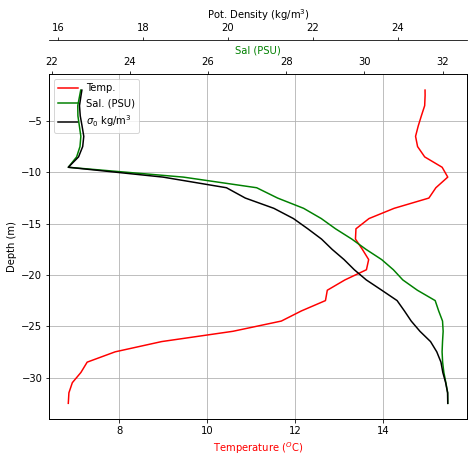

In [79]:
fig = plt.figure(figsize = (190/25.4, 230*0.7/25.4) )

ax = plt.subplot()

ln1 = ax.plot(stn6_binned["TempAvg"], -stn6_binned["Depth"], label="Temp.", color="r")
ax.set_xlabel("Temperature ($^O$C)", color="r")

salax = ax.twiny()
ln2 = salax.plot(stn6_binned["SalAvg"], -stn6_binned["Depth"], label="Sal. (PSU)", color="g")
salax.set_xlabel("Sal (PSU)", color="g")

sigma_ax = ax.twiny()
sigma_ax.spines.top.set_position(("axes", 1.1))
ln3 = sigma_ax.plot(stn6_binned["sigma0"], -stn6_binned["Depth"], label="$\sigma_0$ kg/m$^3$", color="k")
sigma_ax.set_xlabel("Pot. Density (kg/m$^3$)")

ax.set_ylabel("Depth (m)")

ax.grid()

lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

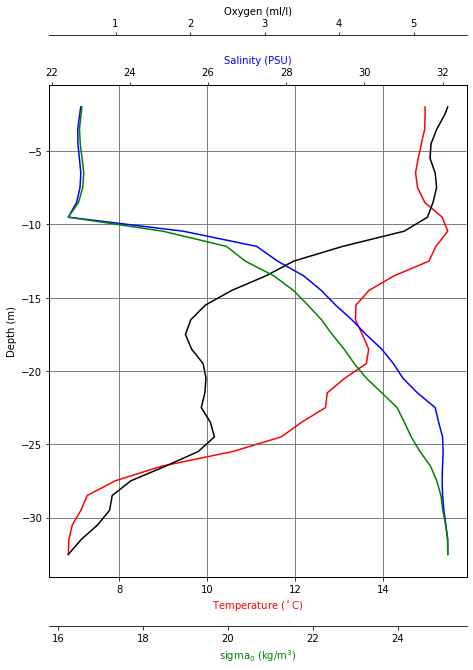

In [80]:
# %load ./solutions/sol_Ex08.py
def plot_one_var(var, depth, ax, xlabel="", ylabel="Depth (m)"):
    ax.plot(var, depth)
    

def plot_multiple_variables(depth, temp, sal, oxy, sigma0, wd = 190/25.4, ht=230/25.4):
    plt.rcParams.update({'font.size': 10})
    plt.figure(figsize=(wd, ht))
    ax = plt.subplot()
    
    ax.plot(temp, -depth, color="r")
    
    ax2 = ax.twiny()
    ax2.plot(sal, -depth, color="b")
    
    ax3 = ax.twiny()
    ax3.spines.top.set_position(("axes", 1.1))
    ax3.plot(oxy, -depth, color="k")
    
    ax4 = ax.twiny()
    ax4.xaxis.set_ticks_position("bottom")
    ax4.xaxis.set_label_position("bottom")

    ax4.spines["bottom"].set_position(("axes", -0.1))
    ax4.plot(sigma0, -depth, color="g")
    
    ax.set_xlabel("Temperature ($^\circ$C)", color="r")
    ax2.set_xlabel("Salinity (PSU)", color="b")
    ax3.set_xlabel("Oxygen (ml/l)", color="k")
    ax4.set_xlabel("sigma$_0$ (kg/m$^3$)", color="g")
    
    
    
    ax.set_ylabel("Depth (m)")
    
    ax.grid(color="0.5", linewidth=1)
    #ax2.grid(color="b", linewidth=0.1)
    #ax3.grid(color="k", linewidth=0.1)
    
    
plot_multiple_variables(stn6_binned["Depth"], stn6_binned["TempAvg"], stn6_binned["SalAvg"], stn6_binned["Oxy1"], stn6_binned["sigma0"])

## Exercise 09: 

Plot temperatures from stations 1 through 6 on the same plot for comparison. Use the station depth to colour the lines. If station depth is unknown, use arbitrarily assigned depths. Provide a colorbar for reference!

Text(0, 0.5, 'Conservative Temperature')

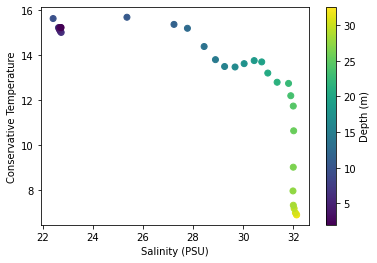

In [22]:
SC = plt.scatter(stn6_binned["SalAvg"], stn6_binned["CT"], c=stn6_binned["Depth"])
cbar = plt.colorbar(SC)
cbar.set_label("Depth (m)")
plt.xlabel("Salinity (PSU)")
plt.ylabel("Conservative Temperature")


In [ ]:
sal_range = np.arange(22, 33, 0.1)
temp_range = np.arange(0, 16, 0.1)

## Exercise 10:

Combine all the station data into one file and plot a T-S diagram scatter-plot with density contours. A TS diagram plots the watermass properties with the temperature on the Y axis and the salinity on the X axis.

1. Use plt.scatter(S, T, c=depths)
1.        plt.contour( \<salinity range\>, \<temperature range\>, \<gridded density\>, levels=[\<some relevant levels here\>])
1. Provide a colorbar of depths
1. Name the axes, name the colorbar
1. Try using oxygen level as the color
1. Name watermasses with plt.text()


An example of a T-S plot follows:

![](./TS.jpg)

## Exercise 11:

1. Plot the surface properties against the station distance. 
1. Interpolate values between stations.